In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import yfinance as yf

from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize

from Data_Retriever import DataRetriever as DatRet
from Markowitz_PT import MarkowitzPT as MPT

<h1> Stock pool </h1>

In [2]:
# Defining stock pool
ticker_df =  pd.DataFrame()
ticker_df["Petroleum"] = ["AKRBP.OL", "EQNR.OL", "ODL.OL"]
ticker_df["Materials"] = ["NHY.OL", "NSKOG.OL", "RANA.OL"]
ticker_df["Food"] = ["LSG.OL", "MOWI.OL", "ORK.OL"]
ticker_df

,Petroleum,Materials,Food
0,AKRBP.OL,NHY.OL,LSG.OL
1,EQNR.OL,NSKOG.OL,MOWI.OL
2,ODL.OL,RANA.OL,ORK.OL


In [3]:
# Retrieve data from yf API
data = DatRet(ticker_df, "2022-02-19", "2025-02-18")
data.retrieve_data()

# Generate benchmark weights thorugh MPT using Sharpe ratio
benchmark = MPT(data.returns, 252,10)
benchmark.frequency_optimizing()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


--Frequency trading using MPT successfully performed--


In [182]:
benchmark.frequency_weights

[[array([0.08750636, 0.08685319, 0.05062049, 0.03356369, 0.02446395,
         0.13753645, 0.00784514, 0.28776166, 0.28384907]),
  np.float64(0.9995490074844542),
  np.float64(0.007902016488263422)],
 [array([0.08641749, 0.08656199, 0.05116953, 0.03395919, 0.02454255,
         0.13698718, 0.00890297, 0.28680767, 0.28465143]),
  np.float64(0.9995338601266636),
  np.float64(0.007904235096397491)],
 [array([0.09415713, 0.07953798, 0.04845562, 0.03335031, 0.02503181,
         0.13919536, 0.00938098, 0.2864127 , 0.28447811]),
  np.float64(0.9995365633159612),
  np.float64(0.007903079124818257)],
 [array([0.09561299, 0.07863206, 0.04797276, 0.03443117, 0.02451307,
         0.13916716, 0.01026965, 0.2841104 , 0.28529075]),
  np.float64(0.999530637632071),
  np.float64(0.007901938579630955)],
 [array([0.0984474 , 0.07713794, 0.0465302 , 0.03532826, 0.0236925 ,
         0.14113579, 0.01087666, 0.2812976 , 0.28555365]),
  np.float64(0.9995225549633123),
  np.float64(0.007899407449932231)],
 [arra

In [181]:
chick

[[array([0.08750636, 0.08685319, 0.05062049, 0.03356369, 0.02446395,
         0.13753645, 0.00784514, 0.28776166, 0.28384907]),
  np.float64(0.9995490074844542),
  np.float64(0.007902016488263422)],
 [array([0.08641749, 0.08656199, 0.05116953, 0.03395919, 0.02454255,
         0.13698718, 0.00890297, 0.28680767, 0.28465143]),
  np.float64(0.9995338601266636),
  np.float64(0.007904235096397491)],
 [array([0.09415713, 0.07953798, 0.04845562, 0.03335031, 0.02503181,
         0.13919536, 0.00938098, 0.2864127 , 0.28447811]),
  np.float64(0.9995365633159612),
  np.float64(0.007903079124818257)],
 [array([0.09561299, 0.07863206, 0.04797276, 0.03443117, 0.02451307,
         0.13916716, 0.01026965, 0.2841104 , 0.28529075]),
  np.float64(0.999530637632071),
  np.float64(0.007901938579630955)],
 [array([0.0984474 , 0.07713794, 0.0465302 , 0.03532826, 0.0236925 ,
         0.14113579, 0.01087666, 0.2812976 , 0.28555365]),
  np.float64(0.9995225549633123),
  np.float64(0.007899407449932231)],
 [arra

In [ ]:
daily_returns = []
for time in range(9):
    ind_day_ret = np.array([data.returns[i][j].iloc[-time].iloc[0] for i in  range(3) for j in range(3)]) 
    daily_returns.append(ind_day_ret)


daily_ben_weights = benchmark.frequency_weights[:-1]

daily_ben_weights = np.array([benchmark.frequency_weights[i][0] for i in range(len(benchmark.frequency_weights))])

daily_exp_weights = np.repeat(1/9,9)


rl_perf = [daily_ben_weights[time]@daily_returns[time] for time in range(9)]

mpt_perf = [daily_exp_weights@daily_returns[time] for time in range(9)]

excess_ret = [rl_perf[time]-mpt_perf[time] for time in range(9)]
plt.plot(excess_ret)

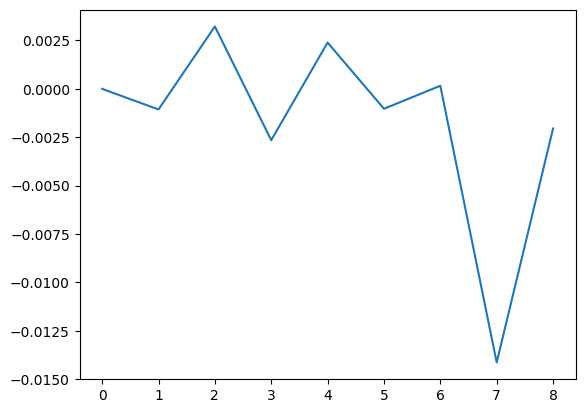

In [201]:
rl_perf = [daily_ben_weights[time]@daily_returns[time] for time in range(9)]

mpt_perf = [daily_exp_weights@daily_returns[time] for time in range(9)]

excess_ret = [rl_perf[time]-mpt_perf[time] for time in range(9)]
plt.plot(excess_ret)

In [ ]:
class BHBAnalyzer():
    
    def __init__(self, 
                 benchmark_data=None,
                 experiment_data=None,
                 raw_data=None
                 ):
        """
        Args:
            benchmark_data: NxM list from MPT
            experiment_data: NxM list from RL    
        """
        self.benchmark_data =  benchmark_data
        self.experiment_data = experiment_data
        self.raw_data = raw_data

    def frequency_analyze():
        pass